In [48]:
#Importing necessary packages and libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
# Requests lets us grab info from a web page
import requests

# BeautifulSoup parses and searches that info
from bs4 import BeautifulSoup

Jacob and Bernie are both athletes on the Men's Soccer Team and one of the biggest challenges faced on any team is the division of minutes across a season that each team and subsequently player plays. For this study, we will examine two perennial powerhouse programs in the Northwest Conference: Whitman College (3rd place in NWC this 2023-2024 season) and Pacific Lutheran University (1st Place in NWC this 2023-2024 season). Scraping various components of both the roster and statistics pages on their respective athletics websites, we will delve into minutes played for each player, breaking things down by position and as above and beyond components attempting to understand elements of Coaching staffs decisions and process for playing players within the league, non-conference games and NCAA tournament (if applicable).  

In [2]:
#First let's turn towards scraping the Whitman Men's Soccer Website!

# Create a variable called URL
url = "https://athletics.whitman.edu/sports/mens-soccer/stats/2023"

# Use requests.get to grab the html
my_html = requests.get(url)

#Turn the html into soup using BeautifulSoup
soup = BeautifulSoup(my_html.text, 'html')

In [3]:
#Creation of dataframe for scraped content. 
column_names = {"Player":[], "Minutes": [], "Number": [], "Points": []}
df = pd.DataFrame(column_names)

In [4]:
#Let's now iterate through to strip player name, minutes played and the player's respective number. 
players = soup.find_all('a', class_= 'hide-on-medium-down')
minutes = soup.find_all('td', {"data-label": "MIN"}, class_='text-center')
numbers = soup.find_all('td', class_= 'hide-on-medium-down')
points = soup.find_all('td', {"data-label": "PTS"}, class_='text-center')
for player, minute, player_number, point in zip(players, minutes, numbers, points):
    player_name = player.text.strip()
    minute_count = minute.text.strip()
    number = player_number.text.strip()
    pts = point.text.strip()
    df.loc[len(df.index)] = [player_name, minute_count, number, pts]

In [5]:
df.head()

,Player,Minutes,Number,Points
0,"McAllister, Lucas",1112,2,17
1,"Gomez, Christian",1119,8,16
2,"Romero, Edwin",1216,9,16
3,"Valero, Sawyer",1068,7,14
4,"Burrill, Jacob",909,11,12


In [6]:
#The dataframe currently continues after we want it to, to combat this lets cap the dataframe at the last player in our roster!
df_wc = df[:29]

In [7]:
df_wc

,Player,Minutes,Number,Points
0,"McAllister, Lucas",1112,2,17
1,"Gomez, Christian",1119,8,16
2,"Romero, Edwin",1216,9,16
3,"Valero, Sawyer",1068,7,14
4,"Burrill, Jacob",909,11,12
5,"Gonzalez, Jr., Pablo",1498,4,8
6,"Stonier, Zachary",882,19,7
7,"Perez-Cuellar, Erick",1258,26,6
8,"Kobayashi, Riki",580,20,5
9,"Taylor, Noa",261,12,5


In [8]:
#We see here that there are duplicate rows for certain players. This is one of the seen inconsistencies within the athletics website. 
#First we must take the parsed string column "Minutes" and convert the values to an integer type to allow us to aggregate the values. 
df_wc["Minutes"] = df_wc["Minutes"].astype(int)
df_wc["Points"] = df_wc["Points"].astype(int)

/var/folders/hx/cdbf_22s6k10chrhytb5467h0000gn/T/ipykernel_3250/1413376873.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wc["Minutes"] = df_wc["Minutes"].astype(int)
/var/folders/hx/cdbf_22s6k10chrhytb5467h0000gn/T/ipykernel_3250/1413376873.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wc["Points"] = df_wc["Points"].astype(int)


In [9]:
#We now leverage groupby to summate minutes for each player. 
df_wc_minutes = df_wc.groupby('Player', as_index=False).agg({'Minutes': 'sum'})

In [10]:
#We now merge our two dataframes to get the numbers back into our df as they were eliminated in the group by (this is a workaround solution!)
df_wc_merged = pd.merge(df_wc, df_wc_minutes, on="Player", how = 'inner')
#Now we drop the duplicate pairs that exist within the df (Alex and Pablo)
df_wc_merged = df_wc_merged.drop_duplicates(subset = 'Player')
#Lastly we eliminate another duplicate column!
df_wc_merged = df_wc_merged.drop('Minutes_x', axis = 1)
df_wc_merged

,Player,Number,Points,Minutes_y
0,"McAllister, Lucas",2,17,1112
1,"Gomez, Christian",8,16,1119
2,"Romero, Edwin",9,16,1216
3,"Valero, Sawyer",7,14,1068
4,"Burrill, Jacob",11,12,909
5,"Gonzalez, Jr., Pablo",4,8,1579
7,"Stonier, Zachary",19,7,882
8,"Perez-Cuellar, Erick",26,6,1258
9,"Kobayashi, Riki",20,5,580
10,"Taylor, Noa",12,5,261


## Scraping Whitman Positions

It's great that we have the minutes played per player, but we also now want to look at the position of each player and ultimately merge this with our previously created df. Let's now scrape the roster instead of the statistics page! We take the number here as a unique identifier due to uniqiue naming order differences! 

In [11]:
# Create a variable called URL
url_pos = "https://athletics.whitman.edu/sports/mens-soccer/roster"

# Use requests.get to grab the html
my_html_pos = requests.get(url_pos)

#Turn the html into soup using BeautifulSoup
soup_pos = BeautifulSoup(my_html_pos.text, 'html')

In [12]:
#Creation of dataframe for scraped content. 
column_names_pos = {"Player":[], "Position": [], "Number": []}
df_players = pd.DataFrame(column_names_pos)

In [13]:
#Similar to before we now iterate through to strip player name, position and the player's respective number. 
players = soup_pos.find_all('div', class_='sidearm-roster-player-name')
player_positions = soup_pos.find_all('div', class_='sidearm-roster-player-position')
numbers = soup_pos.find_all('span', class_='sidearm-roster-player-jersey-number')
for player, player_position, player_number in zip(players, player_positions, numbers):
    player_name = player.find('h3').text.strip()
    position = player_position.find('span', class_='sidearm-roster-player-position-long-short hide-on-small-down').text.strip()
    number = player_number.text.strip()
    df_players.loc[len(df_players.index)] = [player_name, position, number]

In [14]:
#Here we drop one of our teammates as he medically red-shirted the season and thus did not play!
df_players = df_players[1:]

In [15]:
#We now merge our two dataframes on the shared identifier of number utilizing an inner join. 
df_wc_stats = pd.merge(df_wc_merged, df_players, on = 'Number', how = 'inner')
#Removing duplicate column
df_wc_stats = df_wc_stats.drop('Player_y', axis = 1)
#For later comparison we now add a School "tag" to identify each player who plays for Whitman. We will do a similar action for PLU later on!
df_wc_stats['School']='WC'
#For consistency we now rename a couple columns. 
df_wc_stats = df_wc_stats.rename(columns={'Player_x': 'Player', 'Minutes_y':'Minutes'})
df_wc_stats

,Player,Number,Points,Minutes,Position,School
0,"McAllister, Lucas",2,17,1112,Midfield/Forward,WC
1,"Gomez, Christian",8,16,1119,Midfielder,WC
2,"Romero, Edwin",9,16,1216,Forward,WC
3,"Valero, Sawyer",7,14,1068,Forward,WC
4,"Burrill, Jacob",11,12,909,Forward,WC
5,"Gonzalez, Jr., Pablo",4,8,1579,Defender,WC
6,"Stonier, Zachary",19,7,882,Forward,WC
7,"Perez-Cuellar, Erick",26,6,1258,Midfield,WC
8,"Kobayashi, Riki",20,5,580,Midfielder/Forward,WC
9,"Taylor, Noa",12,5,261,Forward,WC


With our scraping for Whitman now done we turn towards arming ourselves with information from PLU!

## Scraping for PLU soccer statistics

This time things are a little bit more streamlined as some of the inconsistencies of the Whitman Athletics Statistics page aren't here! 

In [16]:
# Create a variable called URL
url_plu = "https://golutes.com/sports/mens-soccer/stats/2023"

# Use requests.get to grab the html
my_html_plu = requests.get(url_plu)

#Turn the html into soup using BeautifulSoup
soup_plu = BeautifulSoup(my_html_plu.text, 'html')

In [17]:
#Creation of dataframe for scraped content. 
column_names_plu = {"Player":[], "Minutes": [], "Number": [], "Points": []}
df_plu = pd.DataFrame(column_names_plu)

In [18]:
#Let's now iterate through to strip player name, minutes played and the player's respective number. 
players = soup_plu.find_all('a', class_= 'hide-on-medium-down')
minutes = soup_plu.find_all('td', {"data-label": "MIN"}, class_='text-center')
numbers = soup_plu.find_all('td', class_= 'hide-on-medium-down')
points = soup_plu.find_all('td', {"data-label": "PTS"}, class_='text-center')
for player, minute, player_number, point in zip(players, minutes, numbers, points):
    player_name = player.text.strip()
    minute_count = minute.text.strip()
    number = player_number.text.strip()
    pts = point.text.strip()
    df_plu.loc[len(df_plu.index)] = [player_name, minute_count, number, pts]

In [19]:
#The dataframe currently continues after we want it to, to combat this lets cap the dataframe at the last player in our roster!
df_plu = df_plu[:32]
df_plu

,Player,Minutes,Number,Points
0,"Johnson, Craig",1503,9,49
1,"Thompson, Trevor",1624,16,41
2,"Guyer, Robby",1457,42,26
3,"Bliskis, Owen",372,27,16
4,"Tafolla, Sammy",1498,10,14
5,"Helle, Dane",1097,7,13
6,"O'Brien, Connor",476,12,12
7,"Kamau, Alvin",1286,99,9
8,"Kelly, Brandt",443,20,7
9,"Ross, Jordan",502,15,4


In [20]:
#Now we convert the "Minutes" column (string type) to an integer type to allow us for later comparison. . 
df_plu["Minutes"] = df_plu["Minutes"].astype(int)
df_plu['Points'] = df_plu['Points'].astype(int)

## Scraping PLU Player Positions

Similar to with Whitman, it's great that we have the minutes played per player, but we also now want to look at the position of each player and ultimately merge this with our previously created df. Let's now scrape the roster instead of the statistics page! We take the number here as a unique identifier due to uniqiue naming order differences! 

In [21]:
# Create a variable called URL
url_plu_pos = "https://golutes.com/sports/mens-soccer/roster"

# Use requests.get to grab the html
my_html_plu_pos = requests.get(url_plu_pos)

#Turn the html into soup using BeautifulSoup
soup_plu_pos = BeautifulSoup(my_html_plu_pos.text, 'html')

In [22]:
#Creation of dataframe for scraped content. 
column_names_plu_pos = {"Player":[], "Position": [], "Number": []}
df_players_plu = pd.DataFrame(column_names_plu_pos)

In [23]:
#Similar to before we now iterate through to strip player name, position and the player's respective number. 
players = soup_plu_pos.find_all('div', class_='sidearm-roster-player-name')
player_positions = soup_plu_pos.find_all('div', class_='sidearm-roster-player-position')
numbers = soup_plu_pos.find_all('span', class_='sidearm-roster-player-jersey-number')
for player, player_position, player_number in zip(players, player_positions, numbers):
    player_name = player.find('h3').text.strip()
    position = player_position.find('span', class_='sidearm-roster-player-position-long-short hide-on-small-down').text.strip()
    number = player_number.text.strip()
    df_players_plu.loc[len(df_players_plu.index)] = [player_name, position, number]

In [24]:
df_players_plu

,Player,Position,Number
0,Garrett Sevison,Goalkeeper,00
1,Nicholas Gaston,Goalkeeper,1
2,Elijah Singleton,Midfield/Defense,2
3,Alex White,D,3
4,Alex Coope,M/F,4
5,Sam Erickson,Midfield,5
6,Mattias Anderson,Defense,6
7,Dane Helle,M,7
8,Isaiah Baer,Midfield,8
9,Craig Johnson,Midfield,9


In [25]:
#Merging on the minutes removes any players without statistics. This is different than before where we manually removed a player from our team. 
df_plu_stats = pd.merge(df_plu, df_players_plu, on='Number', how='inner')
#Removal of additional duplicate column
df_plu_stats = df_plu_stats.drop('Player_y', axis = 1)
#Adding our School 'tag' for later comparison. 
df_plu_stats['School']='PLU'
#Renaming column for later comparison and joining of dataframes!
df_plu_stats = df_plu_stats.rename(columns={'Player_x': 'Player'})
df_plu_stats

,Player,Minutes,Number,Points,Position,School
0,"Johnson, Craig",1503,9,49,Midfield,PLU
1,"Thompson, Trevor",1624,16,41,Forward,PLU
2,"Guyer, Robby",1457,42,26,F,PLU
3,"Bliskis, Owen",372,27,16,F,PLU
4,"Tafolla, Sammy",1498,10,14,Midfield,PLU
5,"Helle, Dane",1097,7,13,M,PLU
6,"O'Brien, Connor",476,12,12,M/F,PLU
7,"Kamau, Alvin",1286,99,9,D,PLU
8,"Kelly, Brandt",443,20,7,Forward,PLU
9,"Ross, Jordan",502,15,4,Defense,PLU


We are now armed with information from both schools and can begin to do some analysis!

In [26]:
#Function lookup table and implementation using .replace()
positions_dict = {'Midfield': 'M', 'Forward': 'F', 'Defense': 'D', 'Goalkeeper': 'GK', 'Midfield/Defense': 'D/M',
                 'Defense/Midfield': 'D/M', 'Midfield/Forward': 'M/F','Midfielder': 'M', 'Defender': 'D', 'Midfielder/Defender': 'D/M',
                 'Defender/Midfielder': 'D/M',  'Midfielder/Forward': 'M/F', 'Defender/Midfield': 'D/M' }
df_plu_stats['Position'].replace(positions_dict, inplace=True)
df_wc_stats['Position'].replace(positions_dict, inplace=True)

In [27]:
#Checking for conversion
df_plu_stats

,Player,Minutes,Number,Points,Position,School
0,"Johnson, Craig",1503,9,49,M,PLU
1,"Thompson, Trevor",1624,16,41,F,PLU
2,"Guyer, Robby",1457,42,26,F,PLU
3,"Bliskis, Owen",372,27,16,F,PLU
4,"Tafolla, Sammy",1498,10,14,M,PLU
5,"Helle, Dane",1097,7,13,M,PLU
6,"O'Brien, Connor",476,12,12,M/F,PLU
7,"Kamau, Alvin",1286,99,9,D,PLU
8,"Kelly, Brandt",443,20,7,F,PLU
9,"Ross, Jordan",502,15,4,D,PLU


In [28]:
#Checking for conversion
df_wc_stats

,Player,Number,Points,Minutes,Position,School
0,"McAllister, Lucas",2,17,1112,M/F,WC
1,"Gomez, Christian",8,16,1119,M,WC
2,"Romero, Edwin",9,16,1216,F,WC
3,"Valero, Sawyer",7,14,1068,F,WC
4,"Burrill, Jacob",11,12,909,F,WC
5,"Gonzalez, Jr., Pablo",4,8,1579,D,WC
6,"Stonier, Zachary",19,7,882,F,WC
7,"Perez-Cuellar, Erick",26,6,1258,M,WC
8,"Kobayashi, Riki",20,5,580,M/F,WC
9,"Taylor, Noa",12,5,261,F,WC


## Analysis 

First let's generalize some basic findings specific to each team. How were minutes distributed across positions? This is important as a common thought within soccer that defensive position players typically play more minutes in games due to the responsibilities of the position. 


In [29]:
#Whitman Average Minutes Played Per Position
df_wc_stats.groupby("Position")["Minutes"].mean()

Position
D       846.333333
D/M    1097.000000
F       768.666667
GK      900.000000
M       652.000000
M/F     493.250000
Name: Minutes, dtype: float64

In [30]:
#PLU  Average Minutes Played Per Position
df_plu_stats.groupby("Position")["Minutes"].mean()


Position
D      638.875000
D/M    193.666667
F      688.333333
GK     636.666667
M      701.125000
M/F    904.000000
Name: Minutes, dtype: float64

This is great preliminary information as it provides a quick insight into each position breakdown. One thing immediately stands out here... that there are some weights bringing down certain averages such as PLU goalkeepers. There roster has more players who played very little... let's just check this fact to ensure that this hypothesis is correct!

In [31]:
#Looking at PLU goalkeepers minutes played:
df_plu_gks = df_plu_stats[df_plu_stats["Position"]== "GK"]
#Wow those guys barely played!


In [32]:
#Let's compare this to the Blues GKS
df_wc_gks = df_wc_stats[df_wc_stats["Position"]=="GK"]

In [33]:
#Interesting, let's further analyze this to determine what percentage of total minutes played each position played:
wc_keeper_minutes = df_wc_gks["Minutes"].sum()
df_wc_gks["% Played"] = df_wc_gks["Minutes"] / wc_keeper_minutes * 100
df_wc_gks

/var/folders/hx/cdbf_22s6k10chrhytb5467h0000gn/T/ipykernel_3250/3770624484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wc_gks["% Played"] = df_wc_gks["Minutes"] / wc_keeper_minutes * 100


,Player,Number,Points,Minutes,Position,School,% Played
19,"Haigh, Lucas",44,0,244,GK,WC,13.555556
21,"Jones, Bernie",1,0,1556,GK,WC,86.444444


In [34]:
#Let's now do this for PLU:
plu_keeper_minutes = df_plu_gks["Minutes"].sum()
df_plu_gks["% Played"] = df_plu_gks["Minutes"] / wc_keeper_minutes * 100
df_plu_gks

/var/folders/hx/cdbf_22s6k10chrhytb5467h0000gn/T/ipykernel_3250/2670628153.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plu_gks["% Played"] = df_plu_gks["Minutes"] / wc_keeper_minutes * 100


,Player,Minutes,Number,Points,Position,School,% Played
14,"Gaston, Nicholas",1730,1,2,GK,PLU,96.111111
22,"Hempen, Lucas",133,33,0,GK,PLU,7.388889
26,"Sevison, Garrett",47,00,0,GK,PLU,2.611111


Wow, it appears that PLU shares minutes at the goalkeeper position way less than that of Whitman! As a sidenote, this is incredibly interesting as Nicholas Gaston was recognized with both First team distinction and regional honors. PLU routed certain teams and Nicholas continued playing as opposed to cases at Whitman where goalkeeper(s) swapped. 


wonder who is the most efficient player on either team? We will define efficiency as points per minute played. 

In [35]:
#Our effeciency metric looks at points per minutes played examining point per minute.
df_plu_stats2 = df_plu_stats
df_plu_stats2['Efficiency'] = (df_plu_stats2['Points'])/ (df_plu_stats2['Minutes'])
df_plu_stats2

,Player,Minutes,Number,Points,Position,School,Efficiency
0,"Johnson, Craig",1503,9,49,M,PLU,0.032601
1,"Thompson, Trevor",1624,16,41,F,PLU,0.025246
2,"Guyer, Robby",1457,42,26,F,PLU,0.017845
3,"Bliskis, Owen",372,27,16,F,PLU,0.043011
4,"Tafolla, Sammy",1498,10,14,M,PLU,0.009346
5,"Helle, Dane",1097,7,13,M,PLU,0.011851
6,"O'Brien, Connor",476,12,12,M/F,PLU,0.025210
7,"Kamau, Alvin",1286,99,9,D,PLU,0.006998
8,"Kelly, Brandt",443,20,7,F,PLU,0.015801
9,"Ross, Jordan",502,15,4,D,PLU,0.007968


In [40]:
#We now do the same for Whitman Men's Soccer. 
df_wc_stats2 = df_wc_stats
df_wc_stats2['Efficiency'] = (df_wc_stats2['Points'])/ (df_wc_stats2['Minutes'])
df_wc_stats2

,Player,Number,Points,Minutes,Position,School,Efficiency
0,"McAllister, Lucas",2,17,1112,M/F,WC,0.015288
1,"Gomez, Christian",8,16,1119,M,WC,0.014298
2,"Romero, Edwin",9,16,1216,F,WC,0.013158
3,"Valero, Sawyer",7,14,1068,F,WC,0.013109
4,"Burrill, Jacob",11,12,909,F,WC,0.013201
5,"Gonzalez, Jr., Pablo",4,8,1579,D,WC,0.005066
6,"Stonier, Zachary",19,7,882,F,WC,0.007937
7,"Perez-Cuellar, Erick",26,6,1258,M,WC,0.004769
8,"Kobayashi, Riki",20,5,580,M/F,WC,0.008621
9,"Taylor, Noa",12,5,261,F,WC,0.019157


In [44]:
#Determining the top 5 players per effeicny for PLU
top_5_players_plu = df_plu_stats2.nlargest(8, 'Efficiency')
top_5_players_wc = df_wc_stats2.nlargest(8, 'Efficiency')
top_5_players_plu

,Player,Minutes,Number,Points,Position,School,Efficiency
3,"Bliskis, Owen",372,27,16,F,PLU,0.043011
0,"Johnson, Craig",1503,9,49,M,PLU,0.032601
1,"Thompson, Trevor",1624,16,41,F,PLU,0.025246
6,"O'Brien, Connor",476,12,12,M/F,PLU,0.025210
10,"Shimazu, Yuta",190,26,4,M,PLU,0.021053
2,"Guyer, Robby",1457,42,26,F,PLU,0.017845
8,"Kelly, Brandt",443,20,7,F,PLU,0.015801
5,"Helle, Dane",1097,7,13,M,PLU,0.011851


In [43]:
#Determining the top 5 players per effeicny for WC
top_5_players_wc

,Player,Number,Points,Minutes,Position,School,Efficiency
9,"Taylor, Noa",12,5,261,F,WC,0.019157
0,"McAllister, Lucas",2,17,1112,M/F,WC,0.015288
1,"Gomez, Christian",8,16,1119,M,WC,0.014298
4,"Burrill, Jacob",11,12,909,F,WC,0.013201
2,"Romero, Edwin",9,16,1216,F,WC,0.013158
3,"Valero, Sawyer",7,14,1068,F,WC,0.013109
10,"Lopez-Vega, Fernando",21,4,335,M,WC,0.011940
8,"Kobayashi, Riki",20,5,580,M/F,WC,0.008621


In [51]:
#Combining the two dataframes to look at all the players combined. 
df_stats = pd.concat([df_wc_stats2, df_plu_stats2], ignore_index = True)
df_stats

,Player,Number,Points,Minutes,Position,School,Efficiency
0,"McAllister, Lucas",2,17,1112,M/F,WC,0.015288
1,"Gomez, Christian",8,16,1119,M,WC,0.014298
2,"Romero, Edwin",9,16,1216,F,WC,0.013158
3,"Valero, Sawyer",7,14,1068,F,WC,0.013109
4,"Burrill, Jacob",11,12,909,F,WC,0.013201
5,"Gonzalez, Jr., Pablo",4,8,1579,D,WC,0.005066
6,"Stonier, Zachary",19,7,882,F,WC,0.007937
7,"Perez-Cuellar, Erick",26,6,1258,M,WC,0.004769
8,"Kobayashi, Riki",20,5,580,M/F,WC,0.008621
9,"Taylor, Noa",12,5,261,F,WC,0.019157


This is crazy! Owen Bliskis, clearly a substitute,was by far the most efficient player on the plu roster. He only played 372 minutes but had 16 points, more than all but one player on Whitman's roster. What's interesting is that the next two most efficient players are also forwards, who put in a lot of goals and assists. Perhaps that's why he didn't play as many minutes as perhaps he could, or should, have. 

Text(0.5, 1.0, 'Efficiency by Position')

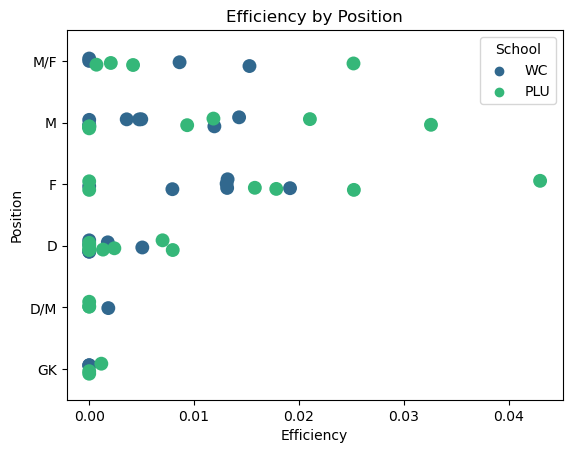

In [57]:
#Plotting effeciency per position across the two teams. 
#Used chatGPT to correct stripplot seaborn code. 
sns.stripplot(x='Efficiency', y='Position', data=df_stats, size=10, palette='viridis', hue = "School", orient='h')
plt.xlabel('Efficiency')
plt.ylabel('Position')
plt.title('Efficiency by Position')

While this includes 0 effeciency players, some quite interesting things become visible here! First off, we can clearly see a PLU goalkeeper had an effeciency contribution on the season! Also Owen's contribution is seen here above the 0.04 mark. Overalll we can see PLY had higher values of efficiency at each position other than D/M in terms of production! This certainly is incredible to see and could provide a great explanation for this teams success even coming from non-starting players, exhibiting deep depth of squad. 

Text(0.5, 1.0, 'Minutes by Position')

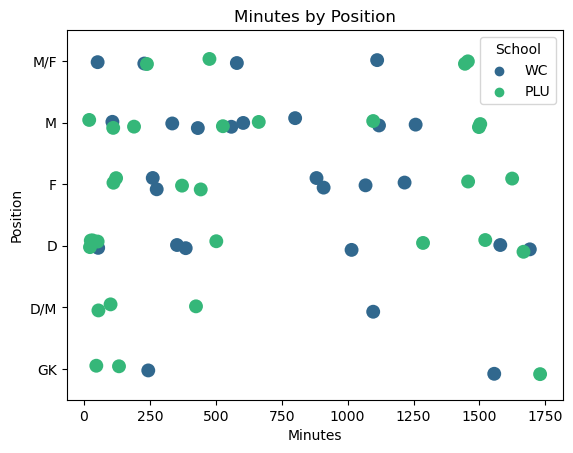

In [59]:
#Let's now compare minutes per position across the two teams. 
sns.stripplot(x='Minutes', y='Position', data=df_stats, size=10, palette='viridis', hue = "School", orient='h')
plt.xlabel('Minutes')
plt.ylabel('Position')
plt.title('Minutes by Position')

In [60]:
#Let's now remove players who did not have efficient contributions.
df_stats_2 = df_stats[df_stats['Efficiency']>0]

Again, we can see here the massive differentials in minutes allocation in these two programs. PLU seems to occupy the extremes while Whitman finds itself split more with values nearer to eachother across almost every position. 

Text(0.5, 1.0, 'Efficiency by Position')

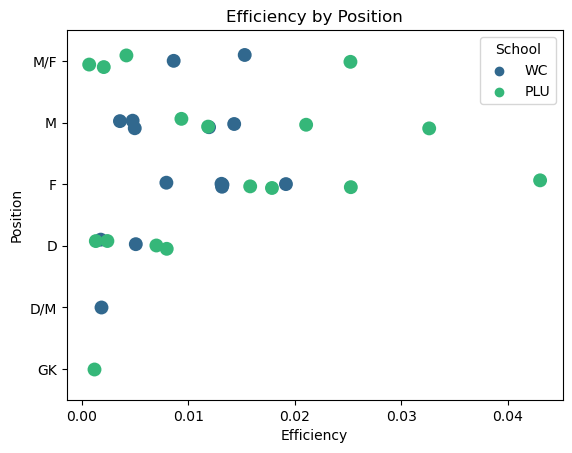

In [61]:
#Graphing this:
sns.stripplot(x='Efficiency', y='Position', data=df_stats_2, size=10, palette='viridis', hue = "School", orient='h')
plt.xlabel('Efficiency')
plt.ylabel('Position')
plt.title('Efficiency by Position')

Wow again we see the upper end production of PLU, particularly in Defense (D) and Midfield (M). With this information in mind we can start to understand elements of what may go into coaches playing decisions. Let's now look into points per position to really hone in upon another element of what may be influencing coaching staffs decisions. 

Text(0.5, 1.0, 'Points by Position')

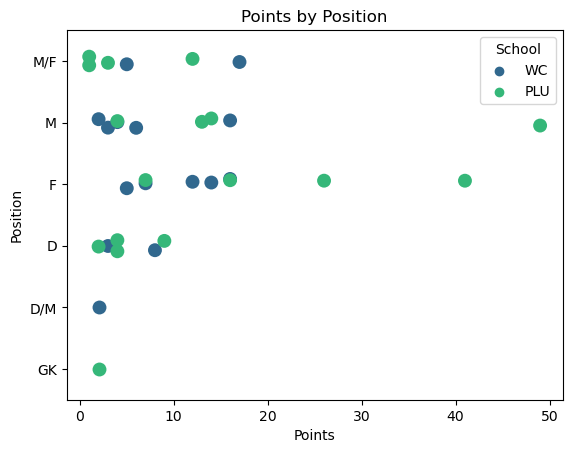

In [64]:
sns.stripplot(x='Points', y='Position', data=df_stats_2, size=10, palette='viridis', hue = "School", orient='h')
plt.xlabel('Points')
plt.ylabel('Position')
plt.title('Points by Position')

This chart shows the distribution of only the players that scored any points during the 2023 season. We see that Craig really was a significant outlier for his position. No other midfielder scored nearly as many points as Craig did. Most of the other position groups are much more compact. It is also expected that forwards get more points because they are more involved in attacks. 

# Above and Beyond

In [66]:
# Create a variable called URL
url_ww = "https://whitworthpirates.com/sports/mens-soccer/stats"

# Use requests.get to grab the html
my_html_ww = requests.get(url_ww)

#Turn the html into soup using BeautifulSoup
soup_ww = BeautifulSoup(my_html_ww.text, 'html')

In [67]:
#Creation of dataframe for scraped content. 
column_names_ww = {"Player":[], "Minutes": [], "Number": [], "Points": []}
df_ww = pd.DataFrame(column_names_ww)

In [68]:
#Let's now iterate through to strip player name, minutes played and the player's respective number. 
players = soup_ww.find_all('a', class_= 'hide-on-medium-down')
minutes = soup_ww.find_all('td', {"data-label": "MIN"}, class_='text-center')
numbers = soup_ww.find_all('td', class_= 'hide-on-medium-down')
points = soup_ww.find_all('td', {"data-label": "PTS"}, class_='text-center')
for player, minute, player_number, point in zip(players, minutes, numbers, points):
    player_name = player.text.strip()
    minute_count = minute.text.strip()
    number = player_number.text.strip()
    pts = point.text.strip()
    df_ww.loc[len(df_ww.index)] = [player_name, minute_count, number, pts]

In [73]:
df_ww = df_ww[:28]
df_ww

,Player,Minutes,Number,Points
0,"Friesen, Cole",1364,11,53
1,"Shaporda, Eric",1101,9,24
2,"Arthur, Beckett",1045,17,15
3,"Crockett, Clayton",1415,13,12
4,"Pumpelly, Christian",845,14,8
5,"Voigt, Jordan",527,22,8
6,"Martin, Caden",418,23,7
7,"Barry, Chris",1593,5,5
8,"Gusman, Dominic",1195,3,4
9,"Joehnk, Lucas",456,18,3


In [75]:
#Now we convert the "Minutes" column (string type) to an integer type to allow us for later comparison. . 
df_ww["Minutes"] = df_ww["Minutes"].astype(int)
df_ww['Points'] = df_ww['Points'].astype(int)

/var/folders/hx/cdbf_22s6k10chrhytb5467h0000gn/T/ipykernel_3250/1149966179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ww["Minutes"] = df_ww["Minutes"].astype(int)
/var/folders/hx/cdbf_22s6k10chrhytb5467h0000gn/T/ipykernel_3250/1149966179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ww['Points'] = df_ww['Points'].astype(int)


In [76]:
# Create a variable called URL
url_ww_pos = "https://whitworthpirates.com/sports/mens-soccer/roster"

# Use requests.get to grab the html
my_html_ww_pos = requests.get(url_ww_pos)

#Turn the html into soup using BeautifulSoup
soup_ww_pos = BeautifulSoup(my_html_ww_pos.text, 'html')

In [77]:
#Creation of dataframe for scraped content. 
column_names_ww_pos = {"Player":[], "Position": [], "Number": []}
df_players_ww = pd.DataFrame(column_names_ww_pos)

In [81]:
#Similar to before we now iterate through to strip player name, position and the player's respective number. 
players = soup_ww_pos.find_all('div', class_='sidearm-roster-player-name')
player_positions = soup_ww_pos.find_all('span', class_='text-bold')
numbers = soup_ww_pos.find_all('span', class_='sidearm-roster-player-jersey-number')
for player, player_position, player_number in zip(players, player_positions, numbers):
    player_name = player.find('h3').text.strip()
    position = player_position.text.strip()
    number = player_number.text.strip()
    df_players_ww.loc[len(df_players_ww.index)] = [player_name, position, number]

In [83]:
#Merging on the minutes removes any players without statistics. This is different than before where we manually removed a player from our team. 
df_ww_stats = pd.merge(df_ww, df_players_ww, on='Number', how='inner')
#Removal of additional duplicate column
df_ww_stats = df_ww_stats.drop('Player_y', axis = 1)
#Adding our School 'tag' for later comparison. 
df_ww_stats['School']='WW'
#Renaming column for later comparison and joining of dataframes!
df_ww_stats = df_ww_stats.rename(columns={'Player_x': 'Player'})
df_ww_stats

,Player,Minutes,Number,Points,Position,School
0,"Friesen, Cole",1364,11,53,F,WW
1,"Shaporda, Eric",1101,9,24,D,WW
2,"Arthur, Beckett",1045,17,15,F,WW
3,"Crockett, Clayton",1415,13,12,M,WW
4,"Pumpelly, Christian",845,14,8,F,WW
5,"Voigt, Jordan",527,22,8,F,WW
6,"Martin, Caden",418,23,7,M,WW
7,"Barry, Chris",1593,5,5,D,WW
8,"Gusman, Dominic",1195,3,4,F,WW
9,"Joehnk, Lucas",456,18,3,D,WW


In [84]:
df_ww_stats2 = df_ww_stats
df_ww_stats2['Efficiency'] = (df_ww_stats2['Points'])/ (df_ww_stats2['Minutes'])
df_ww_stats2

,Player,Minutes,Number,Points,Position,School,Efficiency
0,"Friesen, Cole",1364,11,53,F,WW,0.038856
1,"Shaporda, Eric",1101,9,24,D,WW,0.021798
2,"Arthur, Beckett",1045,17,15,F,WW,0.014354
3,"Crockett, Clayton",1415,13,12,M,WW,0.008481
4,"Pumpelly, Christian",845,14,8,F,WW,0.009467
5,"Voigt, Jordan",527,22,8,F,WW,0.015180
6,"Martin, Caden",418,23,7,M,WW,0.016746
7,"Barry, Chris",1593,5,5,D,WW,0.003139
8,"Gusman, Dominic",1195,3,4,F,WW,0.003347
9,"Joehnk, Lucas",456,18,3,D,WW,0.006579


/var/folders/hx/cdbf_22s6k10chrhytb5467h0000gn/T/ipykernel_3250/1050337338.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Efficiency', y='Position', data=df_ww_stats2, size=10, palette='viridis', orient='h')


Text(0.5, 1.0, 'Efficiency by Position')

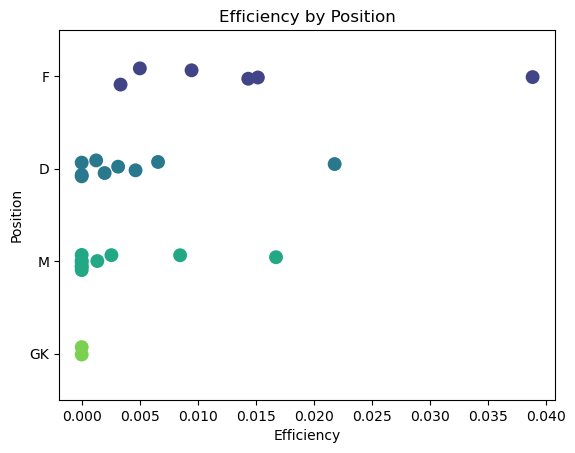

In [92]:
#Graphing this:
sns.stripplot(x='Efficiency', y='Position', data=df_ww_stats2, size=10, palette='viridis', orient='h')
plt.xlabel('Efficiency')
plt.ylabel('Position')
plt.title('Efficiency by Position')

In [87]:
top_5_players_ww = df_ww_stats2.nlargest(8, 'Efficiency')
top_5_players_ww

,Player,Minutes,Number,Points,Position,School,Efficiency
0,"Friesen, Cole",1364,11,53,F,WW,0.038856
1,"Shaporda, Eric",1101,9,24,D,WW,0.021798
6,"Martin, Caden",418,23,7,M,WW,0.016746
5,"Voigt, Jordan",527,22,8,F,WW,0.015180
2,"Arthur, Beckett",1045,17,15,F,WW,0.014354
4,"Pumpelly, Christian",845,14,8,F,WW,0.009467
3,"Crockett, Clayton",1415,13,12,M,WW,0.008481
9,"Joehnk, Lucas",456,18,3,D,WW,0.006579


## Interesting Takeaways

Unlike the PLU, Whitworth doesn't have any players that have a really high efficiency that also played very little minutes. This is different than PLU who did have a player like this!

In [89]:
df_stats_final = pd.concat([df_stats_2, df_ww_stats2], ignore_index = True)
#Let's now remove players who did not have efficient contributions.
df_stats_final_2 = df_stats_final[df_stats_final['Efficiency']>0]
df_stats_final_2

,Player,Number,Points,Minutes,Position,School,Efficiency
0,"McAllister, Lucas",2,17,1112,M/F,WC,0.015288
1,"Gomez, Christian",8,16,1119,M,WC,0.014298
2,"Romero, Edwin",9,16,1216,F,WC,0.013158
3,"Valero, Sawyer",7,14,1068,F,WC,0.013109
4,"Burrill, Jacob",11,12,909,F,WC,0.013201
5,"Gonzalez, Jr., Pablo",4,8,1579,D,WC,0.005066
6,"Stonier, Zachary",19,7,882,F,WC,0.007937
7,"Perez-Cuellar, Erick",26,6,1258,M,WC,0.004769
8,"Kobayashi, Riki",20,5,580,M/F,WC,0.008621
9,"Taylor, Noa",12,5,261,F,WC,0.019157


Text(0.5, 1.0, 'Efficiency by Position')

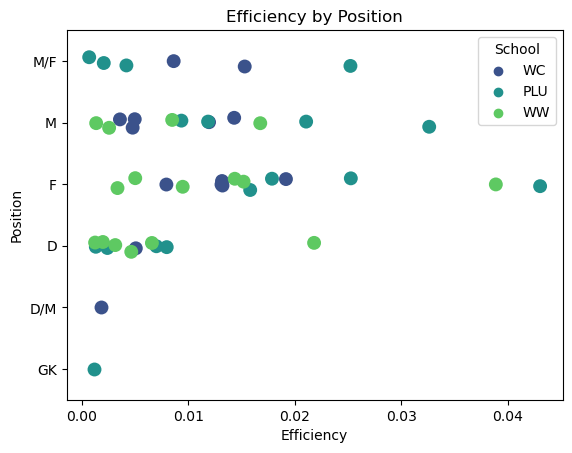

In [91]:
#Graphing this:
sns.stripplot(x='Efficiency', y='Position', data=df_stats_final_2, size=10, hue = "School", palette='viridis', orient='h')
plt.xlabel('Efficiency')
plt.ylabel('Position')
plt.title('Efficiency by Position')

A really interesting finding here is Eric Shaporda of Whitworth who is listed as a defender has extremely high efficiency for the Defensive position. The irony in this is Eric when playing against us played as a forward/midfielder and thus this opens up an interesting discussion into how reliant our analysis is upon the data that has been recorded by these institutions. Maybe this was a mistake, or is this potentially a tactic by the coaching staff, or did this player change positions during his tenure in the program? This is an intersting question! Defenders across the three schools other than this, however were quite even in terms of efficiency, but at the forward position we see players who set themselves apart. The interesting thing about the efficiency aspect of this is this places players who played a lot versus very little against eachother and again presents a light bulb moment for the potential impact that Owen may have in the PLU program come years ahead. 